In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
from astropy.io import ascii

In [2]:
image_file = 'example_data/PAL5_3p6um.fits'
image_data = fits.getdata(image_file, ext=0)

hdu_list = fits.open(image_file)
hdr = hdu_list[0].header
hdu_list.close()

#print(hdr)

In [3]:
filename_ap = 'outputs/apphot_test01.txt'
filename_psf = 'outputs/psf_test01.txt'

#file_ap = pd.read_csv(filename_ap, sep=',')
#file_psf = pd.read_csv(filename_psf, sep=',')
file_ap = ascii.read(filename_ap, delimiter=',')
file_psf = ascii.read(filename_psf, delimiter=',')
print(file_ap)
print(file_psf['apparent_mag'])

#plt.plot(file_ap['apparent_mag_median'], file_psf['apparent_mag'][:1036])

 id   xcenter   ycenter  apparent_mag_median
---- --------- --------- -------------------
   1 1144.9179  20.43013                 nan
   2 1291.0274  23.95022                 nan
   3 1017.0781 26.568878           18.336073
   4 1067.8531 28.996855                 nan
   5 1269.3064 28.508046           17.454892
   6 1385.3451 28.346766                 nan
   7 1140.1015  29.89543            17.35185
   8 1302.3473 30.397221           16.343449
   9 1195.8439 33.438245           18.661222
  10 890.51598 34.531882           20.529255
 ...       ...       ...                 ...
1026 370.53052 660.01817           17.255205
1027 180.68996 662.27167           18.290811
1028 250.27467 664.54277           17.831438
1029 419.91637 664.48844           16.476716
1030 282.68834 665.26201           17.504134
1031 582.45383 665.19198           20.102644
1032 138.25208 667.61265           17.037974
1033 457.16455 669.08339                 nan
1034 433.76179 672.58093           15.627514
1035 197.3

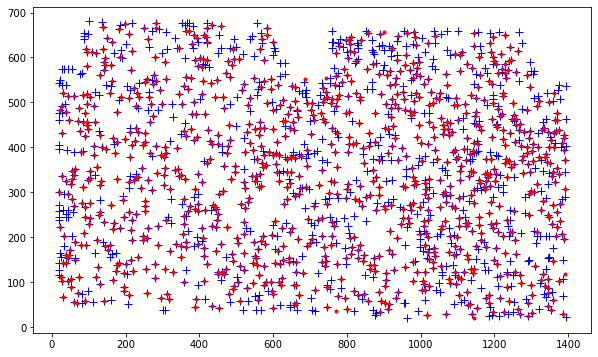

In [4]:
x_ap = file_ap['xcenter']
y_ap = file_ap['ycenter']
x_psf = file_psf['x_0']
y_psf = file_psf['y_0']

plt.plot(x_psf, y_psf, 'b+', lw=0.15, markersize=8)
plt.plot(x_ap, y_ap, 'r.')
plt.gcf().set_size_inches(10, 6)

In [5]:
#coords_ap = SkyCoord(ra = x_ap, dec = y_ap)

In [6]:
w = wcs.WCS(hdr)
print(w)
#w.wcs.print_contents()

crd_ap = np.transpose((x_ap, y_ap))
crd_psf = np.transpose((x_psf, y_psf))
world_ap = w.wcs_pix2world(crd_ap, 0)
world_psf = w.wcs_pix2world(crd_psf, 0)

#print(world_ap, world_psf)

ra_ap = world_ap[:,0]
dec_ap = world_ap[:,1]
ra_psf = world_psf[:,0]
dec_psf = world_psf[:,1]

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 229.025603  -0.055354  
CRPIX : 707.984856  349.128859  
CD1_1 CD1_2  : -2.69158778194532e-05  -0.000164482292120484  
CD2_1 CD2_2  : -0.000164482292120484  2.69158778194532e-05  
NAXIS : 1415  697


In [7]:
c_ap = SkyCoord(ra_ap, dec_ap, frame='icrs', unit='deg')
c_psf = SkyCoord(ra_psf, dec_psf, frame='icrs', unit='deg')
print(len(c_ap), len(c_psf))

idx, d2d, d3d = c_psf.match_to_catalog_sky(c_ap)
print(idx, d2d, d3d)
print(len(idx))

idx2, sep2d, dist3d = match_coordinates_sky(c_psf, c_ap)
print(idx2, sep2d, dist3d)
print(len(idx2))

1036 1545
[   2    5    5 ... 1034 1030 1031] [0d00m32.0799s 0d00m06.0983s 0d00m00s ... 0d00m12.5304s 0d00m16.5387s
 0d00m24.2208s] [1.55527597e-04 2.95654828e-05 0.00000000e+00 ... 6.07493337e-05
 8.01818596e-05 1.17425510e-04]
1545
[   2    5    5 ... 1034 1030 1031] [0d00m32.0799s 0d00m06.0983s 0d00m00s ... 0d00m12.5304s 0d00m16.5387s
 0d00m24.2208s] [1.55527597e-04 2.95654828e-05 0.00000000e+00 ... 6.07493337e-05
 8.01818596e-05 1.17425510e-04]
1545


In [8]:
data_ap_new = file_ap.copy()
data_psf_new = file_psf.copy()
#print(data_ap_new, data_ap_new['xcenter'])
data_ap_new['ra'] = ra_ap
data_ap_new['dec'] = dec_ap
data_psf_new['ra'] = ra_psf
data_psf_new['dec'] = dec_psf
print(data_ap_new['ra'])

        ra        
------------------
 229.0677163552491
229.06320470643374
229.07014754748513
229.06838153896868
229.06303966191768
  229.059942911696
229.06628911605853
229.06183960243595
229.06420603322724
229.07224429011305
               ...
 228.9833587283783
228.98809780745717
228.98585131411272
228.98129418107195
228.98486056726193
 228.9768036058942
228.98836156767945
 228.9795358229646
 228.9795904484014
228.98559241232584
228.98318574946825
Length = 1036 rows


In [9]:
radius = 0.001 * u.arcsec
selection = (d2d > radius)
match_index = idx
match_index[selection] = -99.
s2 = (match_index >= 0)

print(s2)
#np.savetxt('outputs/welp.txt', s2, delimiter=',')
#s2.write('outputs/welp.txt', format='csv', overwrite=True)

[False False  True ... False False False]


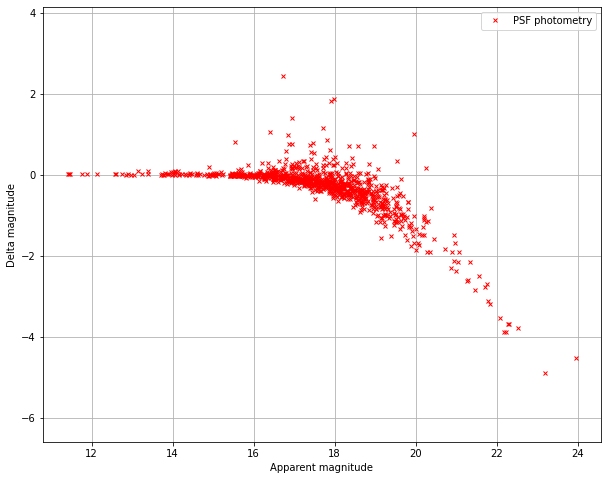

In [16]:
#ind = ((match_index >= 0))  # removes -99 indices
#ind2 = ((data_ap_new['apparent_mag_median'][match_index][ind] > 0) & (data_psf_new['apparent_mag'][ind] > 0))
#mag_ap = data_ap_new['apparent_mag_median'][match_index][ind][ind2]
#mag_psf = data_psf_new['apparent_mag'][ind][ind2]
#delta_mag = data_ap_new['apparent_mag_median'][match_index][ind][ind2] - data_psf_new['apparent_mag'][ind][ind2]

ind = ((match_index >= 0))  # removes -99 indices
mag_ap = data_ap_new['apparent_mag_median'][match_index][ind]
mag_psf = data_psf_new['apparent_mag'][ind]
delta_mag = data_ap_new['apparent_mag_median'][match_index][ind] - data_psf_new['apparent_mag'][ind]

#plt.plot(mag_ap, delta_mag, 'b+', label='Aperture photometry', markersize=4)
plt.plot(mag_psf, delta_mag, 'rx', label='PSF photometry', markersize=4)
plt.xlabel('Apparent magnitude')
plt.ylabel('Delta magnitude')
plt.legend()
plt.grid()
plt.axis('equal')
plt.gcf().set_size_inches(10, 8)

#print(mag_ap[69], mag_psf[69], delta_mag[69])

with 0.6x0.6 arcsec pixels, 6 pix (i.e. aperture radius) = 3.6 arcsec = 0.001 deg:

(definitely don't want to use this for max separation tho; since psf and ap phot both use ap phot to detect stars, the centroid coords should hopefully be identical, or at least very very close)

In [11]:
x = 3.6 * u.arcsec
x.to(u.deg)

<Quantity 0.001 deg>

In [12]:
#max_sep = 0.0001 * u.deg
max_sep = 0.001 * u.arcsec
constraint = d2d < max_sep
c_psf_matches = c_psf[constraint]
c_ap_matches = c_ap[idx[constraint]]

print(len(c_psf_matches))
print(len(c_ap_matches))
print(c_psf_matches)
print(c_ap_matches)

1028
1028
<SkyCoord (ICRS): (ra, dec) in deg
    [(229.05994291, -0.17553926), (229.06320471, -0.16014406),
     (229.06420603, -0.14423273), ..., (228.97953582, -0.00562422),
     (228.97959045, -0.00168075), (228.98559241,  0.0372694 )]>
<SkyCoord (ICRS): (ra, dec) in deg
    [(229.05994291, -0.17553926), (229.06320471, -0.16014406),
     (229.06420603, -0.14423273), ..., (228.97953582, -0.00562422),
     (228.97959045, -0.00168075), (228.98559241,  0.0372694 )]>


[-2.28533512 -2.28527819 -2.28526071 ... -2.28673849 -2.28673753
 -2.28663278]


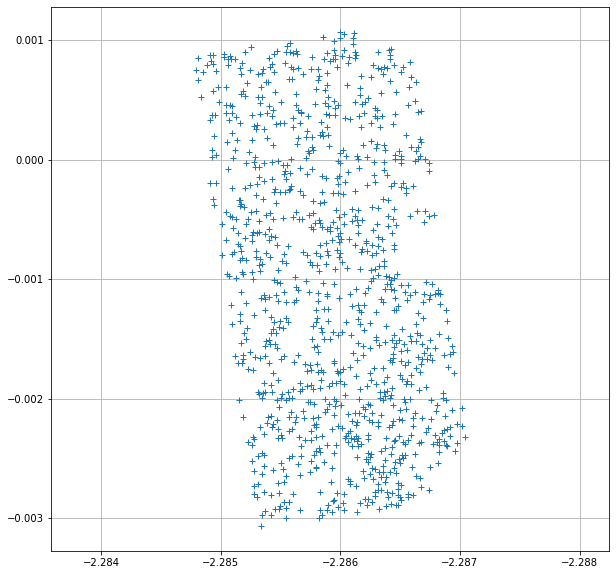

In [13]:
ra_rad = c_ap_matches.ra.wrap_at(180 * u.deg).radian  # can also use c_psf_matches as they're identical
dec_rad = c_ap_matches.dec.radian
print(ra_rad)

#plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.axis('equal')
plt.gca().invert_xaxis()
plt.plot(ra_rad, dec_rad, '+', markersize=6)
plt.gcf().set_size_inches(10, 10)